## 다중공선성

In [69]:
from sklearn import linear_model
import numpy as np
import pandas as pd

data = pd.DataFrame({'x1': [1,4,5,8,10],
                     'x2': [3,5,7,9,10],
                     'x3': [7,8,5,7,4],
                     'y': [30,40,45,60,61]})

In [70]:
# LinearRegression()을 사용해 선형회귀모델을 받는다
# .fit을 통해서 X값과 y값을 통해 모델을 학습시킨다
linear_regresstion = linear_model.LinearRegression()
linear_regresstion.fit(X = pd.DataFrame(data[['x1' , 'x2' , 'x3']]) , y = data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
# score를 통해 R_squared를 구함
linear_regresstion.score(X = pd.DataFrame(data[['x1', 'x2', 'x3']]), y = data['y'])

0.9952763020975958

In [72]:
# predict를 통해 y값을 예측함
prediction = linear_regresstion.predict(X = pd.DataFrame(data[['x1','x2','x3']]))
prediction

array([28.98387097, 41.06451613, 45.82258065, 59.32258065, 60.80645161])

In [73]:
# y예측값과 진짜 y값을 뺸 잔차를 구해준다.
residual = prediction - data['y']
residual

0   -1.016129
1    1.064516
2    0.822581
3   -0.677419
4   -0.193548
Name: y, dtype: float64

In [74]:
# 잔차 제곱의 평균을 계산
MSE = (residual*residual).sum() / 5
MSE

0.6677419354838687

In [75]:
# 제곱근 잔차 제곱의 편균을 계산
RMSE = ((residual*residual).sum()/5)**0.5
RMSE

0.8171547806161747

In [76]:
# x1이 종속성이 의심된다면 x2 와 x3를 X로 y값을 x1을 준다
# a의 값과 b의 값을 구해준다
linear_regresstion.fit(X = pd.DataFrame(data[['x2','x3']]) , y = data['x1'])

print('a value= ', linear_regresstion.intercept_)
print('b value= ', linear_regresstion.coef_)

a value=  -3.4623255813953495
b value=  [1.2427907  0.09860465]


In [77]:
# x1 예측에 대한 r_squared를 구한다
r_squared = linear_regresstion.score(X = pd.DataFrame(data[['x2' , 'x3']]) , y = data['x1'])
r_squared

0.9730383815466063

In [78]:
# LinearRegresstion을 편하게 사용하기 위해 import
# 매게 변수로 X값과 y 값을 받아 r_squared 구하고 VIF를 return 한다
# VIF가 10보다 크다면 문제가 있기 때문에 해당 칼럼을 삭제한다
from sklearn.linear_model import LinearRegression
def sklearn_VIF(x , y):
    r_squared_ = LinearRegression().fit(x , y).score(x , y)
    return 1 / (1 - r_squared_)

In [79]:
sklearn_VIF(data[['x2','x3']] , data['x1'])

37.08976157082763

In [80]:
sklearn_VIF(data[['x1','x3']] , data['x2'])

39.83842917251046

In [81]:
sklearn_VIF(data[['x1','x2']] , data['x3'])

1.7267882187938297

In [82]:
new_data = data[['x1', 'x3' , 'y']]

new_data

,x1,x3,y
0,1,7,30
1,4,8,40
2,5,5,45
3,8,7,60
4,10,4,61


In [83]:
sklearn_VIF(data[['x1']] , data['x3'])

1.5339491916859125

In [84]:
sklearn_VIF(data[['x3']] , data['x1'])

1.5339491916859123

In [85]:
linear_regresstion = linear_model.LinearRegression()
linear_regresstion.fit(X = pd.DataFrame(data[['x1', 'x3']]) , y = data['y'])

prediction = linear_regresstion.predict(X = pd.DataFrame(data[['x1','x3']]))
prediction

array([29.61778291, 42.48845266, 43.70323326, 57.4965358 , 62.69399538])

In [86]:
residual = prediction - data['y']
residual

0   -0.382217
1    2.488453
2   -1.296767
3   -2.503464
4    1.693995
Name: y, dtype: float64

In [87]:
MSE = (residual*residual).sum() / 5
MSE

3.4314087759815246

In [88]:
RMSE = ((residual*residual).sum()/5)**0.5
RMSE

1.8524062124657013

## 미국 경제 데이터를 이용한 다중 공선성 예제

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns

In [90]:
from statsmodels.datasets.longley import load_pandas
# gnp deflator(실질 gnp), GNP, 실업자수,군대, 인구
dfX = load_pandas().exog
# 고용자 수
dfy = load_pandas().endog
# 데이터프레임 만들기
df = pd.concat([dfX,dfy],axis = 1)

In [91]:
# 공분산으로 상관관계를 확인. 공선성이 되는 값을 없에야 되기 때문에
df.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149,0.970899
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273,0.983552
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257,0.502498
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245,0.457307
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953,0.960391
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000,0.971329
TOTEMP,0.970899,0.983552,0.502498,0.457307,0.960391,0.971329,1.000000


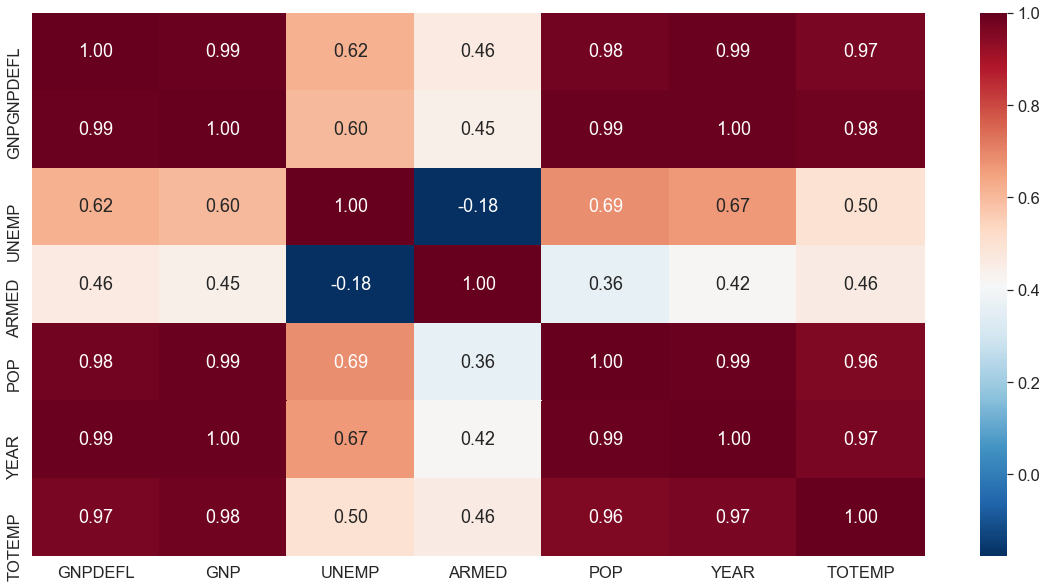

In [92]:
# 그림으로 보기
sns.set(font_scale=1.5)
f , ax = plt.subplots(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "RdBu_r")

In [93]:
# 데이터의 범주가 여러가지이기 때문에 맞춰줘야한다. 즉 스케일러를 사용
y = df['TOTEMP']
X = df.drop(["TOTEMP" , "YEAR"] , axis = 1)
X.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289.0,2356.0,1590.0,107608.0
1,88.5,259426.0,2325.0,1456.0,108632.0
2,88.2,258054.0,3682.0,1616.0,109773.0
3,89.5,284599.0,3351.0,1650.0,110929.0
4,96.2,328975.0,2099.0,3099.0,112075.0


In [94]:
# 범주를 같게 해주기위해서 Scaler사용
# 최대값 = 1, 최솟값 = 0 으로 하여 그사이에 값들이 있도록 하는 방법
from sklearn.preprocessing import MinMaxScaler
# 데이터의 범위를 일정하게 만들어주는 객체
scaler = MinMaxScaler()
# 각 컬럼의 평균 표준편차 계산
scaler.fit(X)
# (데이터 - 최소값) / (최대값 - 최소값) 를 계산해서 각 컬럼의 데이터 범위를 0-1 사이로 일정하게 맞춰서 X_scaled에 대입
X_scaled = scaler.transform(X)
X_scaled

array([[0.        , 0.        , 0.16553134, 0.0626754 , 0.        ],
       [0.16224189, 0.07840489, 0.15497275, 0.        , 0.04556579],
       [0.15339233, 0.07412548, 0.61716621, 0.0748363 , 0.09633783],
       [0.19174041, 0.15692207, 0.50442779, 0.09073901, 0.14777733],
       [0.38938053, 0.29533538, 0.07799728, 0.76847521, 0.19877186],
       [0.44542773, 0.35155409, 0.02111717, 1.        , 0.25194678],
       [0.4719764 , 0.40890192, 0.        , 0.97801684, 0.33311084],
       [0.50147493, 0.4018122 , 0.58174387, 0.88587465, 0.38317092],
       [0.53687316, 0.50897522, 0.35217984, 0.74462114, 0.43518889],
       [0.63716814, 0.57669406, 0.32425068, 0.65528531, 0.49508299],
       [0.74926254, 0.65027058, 0.36307902, 0.62768943, 0.5712188 ],
       [0.820059  , 0.65581323, 0.95742507, 0.55238541, 0.63818805],
       [0.87315634, 0.77483196, 0.66178474, 0.51262862, 0.70119699],
       [0.92035398, 0.83689275, 0.70197548, 0.494855  , 0.79028167],
       [0.96460177, 0.88546342, 1.

In [95]:
X = pd.DataFrame(X_scaled, columns = X.columns)
X

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,0.000000,0.000000,0.165531,0.062675,0.000000
1,0.162242,0.078405,0.154973,0.000000,0.045566
2,0.153392,0.074125,0.617166,0.074836,0.096338
3,0.191740,0.156922,0.504428,0.090739,0.147777
4,0.389381,0.295335,0.077997,0.768475,0.198772
5,0.445428,0.351554,0.021117,1.000000,0.251947
6,0.471976,0.408902,0.000000,0.978017,0.333111
7,0.501475,0.401812,0.581744,0.885875,0.383171
8,0.536873,0.508975,0.352180,0.744621,0.435189
9,0.637168,0.576694,0.324251,0.655285,0.495083


In [96]:
from sklearn.linear_model import LinearRegression
# 선형 회귀 객체 생성
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
# Weight
print(reg.coef_)
# Bias
print(reg.intercept_)

[-1642.88987543 23084.79411175 -1185.7654284  -1198.33955478
 -9068.05060078]
60316.520285629886


In [98]:
print(f"the linear model is : Y = {reg.intercept_} + {reg.coef_[0]}*GNPDEFL + {reg.coef_[1]}*GNP + {reg.coef_[2]}*UNEMP+{reg.coef_[3]}*ARMED+{reg.coef_[4]}*POP")

the linear model is : Y = 60316.520285629886 + -1642.889875430809*GNPDEFL + 23084.794111748724*GNP + -1185.7654284028133*UNEMP+-1198.3395547765765*ARMED+-9068.050600778124*POP


In [99]:
predictions = reg.predict(X)
predictions

array([60045.13254307, 61262.98126938, 60080.59511106, 61577.10404942,
       63678.7134359 , 64192.23972166, 64787.86941276, 63542.40042971,
       65927.85839769, 66923.40975212, 67734.37439117, 66524.21866929,
       69011.34237133, 69532.28010289, 69192.6183171 , 71058.86202547])

In [100]:
residuals = y-predictions
residuals.describe()

count    1.600000e+01
mean     3.637979e-12
std      3.945662e+02
min     -5.532397e+02
25%     -3.647828e+02
50%      6.106239e+01
75%      2.054978e+02
max      9.335902e+02
Name: TOTEMP, dtype: float64

In [101]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE / SST)
R_squared

0.9873776967532714

In [102]:
# 다중공선성을 계산하는 함수 구현
# exog : 데이터 프레임
# exog_idx : 다중 공선성을 계산하고자 하는 컬럼의 인덱스

def variance_inflation_factor(exog, exog_idx):
    # X의 열개수
    k_vars = exog.values.shape[1]
    # 하나의 column의 행series x_i
    x_i = exog.iloc[:, exog_idx]
    # 정한 하나의 series 빼고 전부 x_noti
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog.iloc[:, mask]
    
    # x_i 를 y, x_noti를 x 로해서 선형회귀 해서 R_square를 구해봄
    r_squared_i = LinearRegression().fit(X=pd.DataFrame(x_noti), y=pd.Series(x_i)).score(X=pd.DataFrame(x_noti), y=pd.Series(x_i))
    vif = 1. / (1. - r_squared_i)
    return vif

In [103]:
# 다중 공선성을 계산해서 저장할 DataFrame생성
vif = pd.DataFrame()
# VIF Factor 컬럼 추가
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
# X 의 컬럼명을 features컬럼에 대입
vif["features"] = X.columns
vif

,VIF Factor,features
0,130.829201,GNPDEFL
1,639.049777,GNP
2,10.786858,UNEMP
3,2.505775,ARMED
4,339.011693,POP


In [104]:
# 다중 공선성 지수가 가장 높은 GNP를 삭제
X = X.drop(['GNP'], axis = 1)
X.head()

,GNPDEFL,UNEMP,ARMED,POP
0,0.000000,0.165531,0.062675,0.000000
1,0.162242,0.154973,0.000000,0.045566
2,0.153392,0.617166,0.074836,0.096338
3,0.191740,0.504428,0.090739,0.147777
4,0.389381,0.077997,0.768475,0.198772


In [105]:
# 다시 실행
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,35.970754,GNPDEFL
1,3.147600,UNEMP
2,2.497795,ARMED
3,34.588299,POP


In [106]:
X = X.drop(['GNPDEFL'], axis = 1)
X.head()

,UNEMP,ARMED,POP
0,0.165531,0.062675,0.000000
1,0.154973,0.000000,0.045566
2,0.617166,0.074836,0.096338
3,0.504428,0.090739,0.147777
4,0.077997,0.768475,0.198772


In [107]:
# 또다시 실행
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,3.146686,UNEMP
1,1.918225,ARMED
2,3.514335,POP


In [108]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
predictions=reg.predict(X)
predictions

array([60598.5496127 , 61281.689816  , 60273.87579533, 61373.84752219,
       63331.98715502, 64166.70776104, 65355.60064989, 63974.24109266,
       65567.29269524, 66518.76815899, 67425.21528931, 66221.51689448,
       68161.42309742, 69235.07580447, 69651.74661309, 71934.4620422 ])

In [110]:
residuals = y - predictions
residuals.describe()

count    1.600000e+01
mean     1.818989e-12
std      6.120633e+02
min     -1.383462e+03
25%     -2.868489e+02
50%     -1.353385e+02
75%      3.596200e+02
max      1.338232e+03
Name: TOTEMP, dtype: float64

In [111]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_square = 1- (SSE / SST)
R_square

0.9696267343200499